In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In this project, I would like to create a model that predicts housing prices. The first step is to load the train and test dataset.

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape, test.shape

((1460, 81), (1459, 80))

Note: The test data is missing the 'SalePrice' column which is what I'm trying to predict. 
Now, let's see what data are missing.

In [4]:
sum_null = train.isna().sum()
sum_null[sum_null != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

From the above output and the description of those columns, LotFrontage, MasVnrArea, and GarageYrBlt are the only numerical features. The others are all categorical. Moreover, it seems like most of the null values aren't missing, but rather misrepresented. For instance, the "null values" in the column Alley represents that there are no alley access. The only columns that appear to actually having missing values are LotFrontage, MasVnrArea, Electrical, and GarageYrBlt.

Thus, let's attempt to replace the null values with the correct representation for the column 'Alley'.

In [5]:
def alley_replace(dataframe):
    replacement = {'Alley' : {
        'Grvl' : 'Gravel',
        'Pave' : 'Paved',
        np.nan : 'No alley access'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe
#Replace 'Nan' values with 'No alley access'

In [6]:
train = alley_replace(train)
test = alley_replace(test)

In [7]:
sum_null = train.isna().sum()
sum_null[sum_null != 0]

LotFrontage      259
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

The column Alley is not there anymore after I replaced the missing values with the appropriate value. I will do the same for the rest of the columns that have misrepresented null values for the train and test datasets.

In [8]:
def masvnrtype_replace(dataframe):
    replacement = {'MasVnrType' : {
        'BrkCmn' : 'Brick Common',
        'BrkFace' : 'Brick Face',
        'CBlock' : 'Cinder Block',
        'Stone' : 'Stone',
        np.nan : 'None'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def bsmtqual_replace(dataframe):
    replacement = {'BsmtQual' : {
        'Ex' : 'Excellent',
        'Gd' : 'Good',
        'TA' : 'Average',
        'Fa' : 'Fair',
        'Po' : 'Poor',
        np.nan : 'No Basement'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def bsmtcond_replace(dataframe):
    replacement = {'BsmtCond' : {
        'Ex' : 'Excellent',
        'Gd' : 'Good',
        'TA' : 'Average',
        'Fa' : 'Fair',
        'Po' : 'Poor',
        np.nan : 'No Basement'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def bsmtexp_replace(dataframe):
    replacement = {'BsmtExposure' : {
        'Gd' : 'Good Exposure',
        'Av' : 'Average Exposure',
        'Mn' : 'Minimum Exposure',
        'No' : 'No Exposure',
        np.nan : 'No Basement'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def bsmtfin1_replace(dataframe):
    replacement = {'BsmtFinType1' : {
        'GLQ' : 'Good Living Quarters',
        'ALQ' : 'Average Living Quarters',
        'BLQ' : 'Below Average Living Quarters',
        'Rec' : 'Average Rec Room',
        'LwQ' : 'Low Quality',
        'Unf' : 'Unfinished',
        np.nan : 'No Basement'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def bsmtfin2_replace(dataframe):
    replacement = {'BsmtFinType2' : {
        'GLQ' : 'Good Living Quarters',
        'ALQ' : 'Average Living Quarters',
        'BLQ' : 'Below Average Living Quarters',
        'Rec' : 'Average Rec Room',
        'LwQ' : 'Low Quality',
        'Unf' : 'Unfinished',
        np.nan : 'No Basement'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def fireplacequ_replace(dataframe):
    replacement = {'FireplaceQu' : {
        'Ex' : 'Excellent',
        'Gd' : 'Good',
        'TA' : 'Average',
        'Fa' : 'Fair',
        'Po' : 'Poor',
        np.nan : 'No Fireplace'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def garagetype_replace(dataframe):
    replacement = {'GarageType' : {
        '2Types' : 'More than one type',
        'Attchd' : 'Attached',
        'Basement' : 'Basment Garage',
        'Builtin' : 'Built-in',
        'CarPort' : 'Car Port',
        'Detchd' : 'Detached',
        np.nan : 'No Garage'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def garagefin_replace(dataframe):
    replacement = {'GarageFinish' : {
        'Fin' : 'Finished',
        'RFn' : 'Rough Finished',
        'Unf' : 'Unfinished',
        np.nan : 'No Garage'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def garagequal_replace(dataframe):
    replacement = {'GarageQual' : {
        'Ex' : 'Excellent',
        'Gd' : 'Good',
        'TA' : 'Average',
        'Fa' : 'Fair',
        'Po' : 'Poor',
        np.nan : 'No Garage'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def garagecond_replace(dataframe):
    replacement = {'GarageCond' : {
        'Ex' : 'Excellent',
        'Gd' : 'Good',
        'TA' : 'Average',
        'Fa' : 'Fair',
        'Po' : 'Poor',
        np.nan : 'No Garage'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def poolqc_replace(dataframe):
    replacement = {'PoolQC' : {
        'Ex' : 'Excellent',
        'Gd' : 'Good',
        'TA' : 'Average',
        'Fa' : 'Fair',
        np.nan : 'No Pool'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def fence_replace(dataframe):
    replacement = {'Fence' : {
        'GdPrv' : 'Good Privacy',
        'MnPrv' : 'Minimum Privacy',
        'GdWo' : 'Good Wood',
        'MnWw' : 'Minimum Wood',
        np.nan : 'No Fence'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

def misc_replace(dataframe):
    replacement = {'MiscFeature' : {
        'Elev' : 'Elevator',
        'Gar2' : '2nd Garage',
        'Othr' : 'Other',
        'Shed' : 'Shed',
        'TenC' : 'Tennis Court',
        np.nan : 'None'
    }}
    dataframe = dataframe.replace(replacement)
    return dataframe

In [9]:
train = masvnrtype_replace(train)
train = bsmtqual_replace(train)
train = bsmtcond_replace(train)
train = bsmtexp_replace(train)
train = bsmtfin1_replace(train)
train = bsmtfin2_replace(train)
train = fireplacequ_replace(train)
train = garagetype_replace(train)
train = garagefin_replace(train)
train = garagequal_replace(train)
train = garagecond_replace(train)
train = poolqc_replace(train)
train = fence_replace(train)
train = misc_replace(train)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [10]:
test = masvnrtype_replace(test)
test = bsmtqual_replace(test)
test = bsmtcond_replace(test)
test = bsmtexp_replace(test)
test = bsmtfin1_replace(test)
test = bsmtfin2_replace(test)
test = fireplacequ_replace(test)
test = garagetype_replace(test)
test = garagefin_replace(test)
test = garagequal_replace(test)
test = garagecond_replace(test)
test = poolqc_replace(test)
test = fence_replace(test)
test = misc_replace(test)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,No alley access,Reg,Lvl,AllPub,...,120,0,No Pool,Minimum Privacy,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,2nd Garage,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,Minimum Privacy,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No alley access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No alley access,IR1,HLS,AllPub,...,144,0,No Pool,No Fence,None,0,1,2010,WD,Normal


In [11]:
sum_null = train.isna().sum()
sum_null[sum_null != 0]

LotFrontage    259
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64

The column LotFrontage has a lot of missing values so it'd be a bad idea to remove all the rows that have the missing values. Thus, I've decided to replace those missing values with the average value of LotFrontage (this process is known as mean imputation). This might not be the best way to replace null values, but at least the mean value will be preserved.

In [12]:
lot_average = train['LotFrontage'].mean()
train['LotFrontage'].fillna(lot_average, inplace = True)

lot_average_test = test['LotFrontage'].mean()
test['LotFrontage'].fillna(lot_average_test, inplace = True)

In [13]:
sum_null = train.isna().sum()
sum_null[sum_null != 0]

MasVnrArea      8
Electrical      1
GarageYrBlt    81
dtype: int64

The rest of the columns that have missing values aren't significant for the purpose of this project, so I'll just remove them.

In [14]:
train.drop(['MasVnrArea', 'Electrical', 'GarageYrBlt'], inplace = True, axis = 1)
test.drop(['MasVnrArea', 'Electrical', 'GarageYrBlt'], inplace = True, axis = 1)

In [15]:
sum_null = train.isna().sum()
sum_null[sum_null != 0]

Series([], dtype: int64)

Although we should never touch our test dataset, I should still check to see if there are anymore missing values; otherwise, it could affect the modeling part of the project.

In [16]:
sum_null_test = test.isna().sum()
sum_null_test[sum_null_test != 0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

From the description, it seems that the missing values in the categorical columns are in fact missing. It would be a bad idea to delete those rows with the missing values because it would affect our submission to Kaggle. Thus, it's best to replace all missing categorical values with the mode of their respective columns (mode imputation). It's also a good idea to replace all missing numerical values with the mean of their respective columns.

In [17]:
#categorical
mszoning_mode = test['MSZoning'].mode()[0]
test['MSZoning'].fillna(mszoning_mode, inplace = True)

utility_mode = test['Utilities'].mode()[0]
test['Utilities'].fillna(utility_mode, inplace = True)

exteriorf_mode = test['Exterior1st'].mode()[0]
test['Exterior1st'].fillna(exteriorf_mode, inplace = True)

exteriors_mode = test['Exterior2nd'].mode()[0]
test['Exterior2nd'].fillna(exteriors_mode, inplace = True)

kitchen_mode = test['KitchenQual'].mode()[0]
test['KitchenQual'].fillna(kitchen_mode, inplace = True)

functional_mode = test['Functional'].mode()[0]
test['Functional'].fillna(functional_mode, inplace = True)

sale_mode = test['SaleType'].mode()[0]
test['SaleType'].fillna(sale_mode, inplace = True)

In [18]:
#numerical
bsmtfin1_average = test['BsmtFinSF1'].mean()
test['BsmtFinSF1'].fillna(bsmtfin1_average, inplace = True)

bsmtfin2_average = test['BsmtFinSF2'].mean()
test['BsmtFinSF2'].fillna(bsmtfin2_average, inplace = True)

bsmtunf_average = test['BsmtUnfSF'].mean()
test['BsmtUnfSF'].fillna(bsmtunf_average, inplace = True)

totalbsmt_average = test['TotalBsmtSF'].mean()
test['TotalBsmtSF'].fillna(totalbsmt_average, inplace = True)

bsmtfull_average = test['BsmtFullBath'].mean()
test['BsmtFullBath'].fillna(bsmtfull_average, inplace = True)

bsmthalf_average = test['BsmtHalfBath'].mean()
test['BsmtHalfBath'].fillna(bsmthalf_average, inplace = True)

garagecars_average = test['GarageCars'].mean()
test['GarageCars'].fillna(garagecars_average, inplace = True)

garagearea_average = test['GarageArea'].mean()
test['GarageArea'].fillna(garagearea_average, inplace = True)

In [19]:
sum_null_test = test.isna().sum()
sum_null_test[sum_null_test != 0]

Series([], dtype: int64)

There are no more missing values in both of the datasets! I can move on to the next phase which is exploratory data analysis. For this part, let's visualize the SalePrice column since that is the value I want to predict.

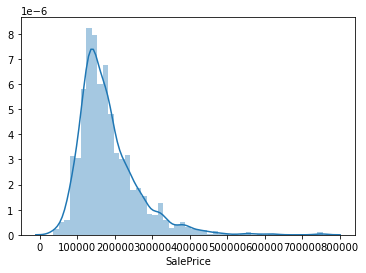

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(train["SalePrice"]);

The historgram is slightly right-skewed which means that the mode of the SalePrice column is less than the median and the median is less than the mean (mode < median < mean).

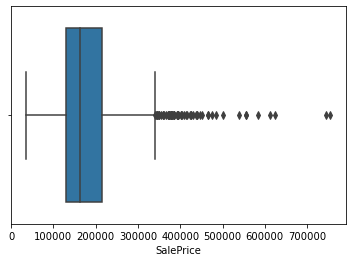

In [21]:
sns.boxplot(x = 'SalePrice', data = train);

The box and whiskers plot indicates that the median value of the SalePrice is slightly above $150000.

Now, let's create two new features called 'TotalFlrSF' (which is equal to '1stFlrSF' plus '2ndFlrSF) and 'TotalBaths' (which is equal to 'BsmtFullBath' + 'FullBath' + .5('BsmtHalfBath' + 'HalfBath')). 

In [22]:
train['TotalFlrSF'] = train['1stFlrSF'] + train['2ndFlrSF']
test['TotalFlrSF'] = test['1stFlrSF'] + test['2ndFlrSF']

In [23]:
half = train['BsmtHalfBath'] + train['HalfBath']
train['TotalBaths'] = train['BsmtFullBath'] + train['FullBath'] + (half/2)

half_test = test['BsmtHalfBath'] + test['HalfBath']
test['TotalBaths'] = test['BsmtFullBath'] + test['FullBath'] + (half_test/2)

In [24]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalFlrSF,TotalBaths
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,No Fence,None,0,2,2008,WD,Normal,208500,1710,3.5
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,No Fence,None,0,5,2007,WD,Normal,181500,1262,2.5
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,No Fence,None,0,9,2008,WD,Normal,223500,1786,3.5
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,No Fence,None,0,2,2006,WD,Abnorml,140000,1717,2.0
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,No Fence,None,0,12,2008,WD,Normal,250000,2198,3.5


Note: Most of these features are categorcical so we can't use them in our predictive modeling. Thus, we should one hot encode them using pd.get_dummies.

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
#get a list of all the categorical columns
categorical_train = [elem for elem in train.columns if train[elem].dtype == 'object']
numerical_train = [elem for elem in train.columns if train[elem].dtype == 'int64' or train[elem].dtype 
                   == 'float64']

categorical_train

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [27]:
categorical_test = [elem for elem in test.columns if test[elem].dtype == 'object']
numerical_test = [elem for elem in test.columns if test[elem].dtype == 'int64' or test[elem].dtype 
                   == 'float64']

categorical_test

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
train_dummies = pd.get_dummies(train, columns=categorical_train, drop_first= True)
test_dummies = pd.get_dummies(test, columns=categorical_test, drop_first= True)

In [29]:
train_dummies

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,790,163,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,275,0,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,49,1029,...,0,0,0,0,1,0,0,0,1,0


In [30]:
test_dummies

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
# train_final = pd.concat([train,train_dummies],axis=1)
# test_final = pd.concat([test,test_dummies],axis=1)

In [32]:
# train = train_final.drop(categorical_train, axis = 1)
# test = test_final.drop(categorical_test, axis = 1)
# train

We can move on to our next phase which is predictive modeling.

In [33]:
import numpy as np
main_list = np.setdiff1d(train_dummies.columns,test_dummies.columns)
main_list

array(['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other',
       'GarageQual_Excellent', 'Heating_GasA', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'MiscFeature_Tennis Court', 'PoolQC_Fair',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'SalePrice', 'Utilities_NoSeWa'], dtype=object)

In [34]:
Y = train_dummies.SalePrice
X = train_dummies.drop(np.append(main_list, 'Id'), axis = 1)

In [35]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [36]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,1,0


Now, we need to split our data into train and test.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .2, random_state = 42)

I'll be defining some models and see which one is better.

In [38]:
from sklearn import linear_model as lm

linear_model = lm.LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [39]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values
    Input:
      predicted (1D array): vector of predicted/fitted values
      actual (1D array): vector of actual values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

In [40]:
y_pred = linear_model.predict(X_train)
rmse(y_pred, y_train)

20815.989215211157

In [41]:
from sklearn.metrics import mean_squared_error

# y_pred = linear_model.predict(X_train)
mean_squared_error(y_train, y_pred, squared = False)

20815.98921521116

In [42]:
from sklearn.ensemble import GradientBoostingRegressor
reg=GradientBoostingRegressor()
reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [43]:
y_pred2 = reg.predict(X_train)
rmse(y_pred2, y_train)

13487.0072902576

In [44]:
mean_squared_error(y_train, y_pred2, squared = False)

13487.007290257608

In [45]:
# y_pred_test3 = reg.predict(test_dummies.drop(['Id'], axis = 1))
# y_pred_test3

array([122734.19492739, 155778.57589609, 174647.40981867, ...,
       170028.48562194, 128906.20365345, 216783.7047332 ])

In [46]:
# from datetime import datetime

# # Assuming that your predictions on the test set are stored in a 1-dimensional array called
# # test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# # Construct and save the submission:
# submission_df = pd.DataFrame({
#     "Id": test_dummies['Id'], 
#     "SalePrice": y_pred_test3,
# }, columns=['Id', 'SalePrice'])
# timestamp = datetime.isoformat(datetime.now()).split(".")[0]
# submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

# print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
# print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2021-01-01T22:44:15.csv.
You may now upload this CSV file to Kaggle for scoring.
